#Mengakses API dari covid19.go.id

In [2]:
import requests
data = requests.get('https://data.covid19.go.id/public/api/update.json')
# mencetak requests data
print(data)
# 200 artinya permintaan sukses atau terpenuhi

<Response [200]>


#Headers API

In [3]:
#mencetak Headers API
print(data.headers)

{'Server': 'nginx', 'Date': 'Tue, 09 Feb 2021 02:50:51 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Tue, 09 Feb 2021 02:45:54 GMT', 'ETag': 'W/"6021f762-203f9"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


#mengekstrak isi respon

In [7]:
cov_id_data = data.json()
#mengekstrak isi respon 2
print('Length of cov_id_data: %d.' %len(cov_id_data))
print('Komponen cov_id_data : %s.' %cov_id_data.keys())
cov_id_update = cov_id_data['update']

Length of cov_id_data: 2.
Komponen cov_id_data : dict_keys(['data', 'update']).


#Analisa Data

In [9]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-02-08
Jumlah penambahan kasus sembuh : 13038
Jumlah penambahan kasus meninggal : 207
Jumlah total kasus positif hingga saat ini : 1166079
Jumlah total kasus meninggal hingga saat ini: 31763


In [17]:
import requests
data_cor_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_jateng_raw = data_cor_jateng.json()

# memahami kasus Covid-19 dijawa tengah

In [18]:
print('Nama-nama elemen utama:\n', cov_jateng_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jateng_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jateng_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jateng_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 129228
Persentase kematian akibat COVID-19 di Jawa Barat         : 4.023122.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 65.268363.2%


# memperoleh informasi yang lebih lengkap

In [19]:
import numpy as np
import pandas as pd
cov_jateng = pd.DataFrame(cov_jateng_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jateng.info())
print('\nLima data teratas cov_jabar:\n', cov_jateng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       323 non-null    int64
 1   KASUS                         323 non-null    int64
 2   MENINGGAL                     323 non-null    int64
 3   SEMBUH                        323 non-null    int64
 4   DIRAWAT_OR_ISOLASI            323 non-null    int64
 5   AKUMULASI_KASUS               323 non-null    int64
 6   AKUMULASI_SEMBUH              323 non-null    int64
 7   AKUMULASI_MENINGGAL           323 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  323 non-null    int64
dtypes: int64(9)
memory usage: 22.8 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584489600000      1  ...                    1                             0
1  1584576000000 

#merapikan data

In [20]:
cov_jateng_tidy = (cov_jateng.drop(columns=[item for item in cov_jateng.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jateng_tidy['tanggal'] = pd.to_datetime(cov_jateng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jateng_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-18           1          1       0
1 2020-03-19           1          0       0
2 2020-03-20           2          0       0
3 2020-03-21           1          1       0
4 2020-03-22           0          0       0


#Visualisasi Data

<Figure size 432x288 with 0 Axes>

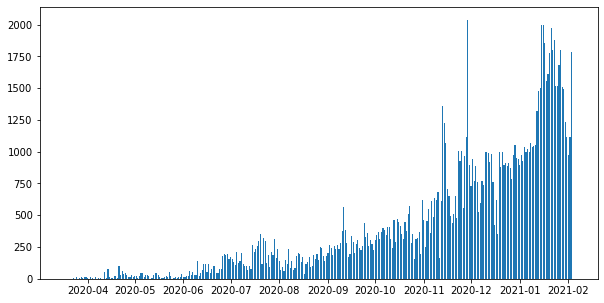

In [26]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='kasus_baru')
plt.show()

# Informasi pada grafik

<Figure size 432x288 with 0 Axes>

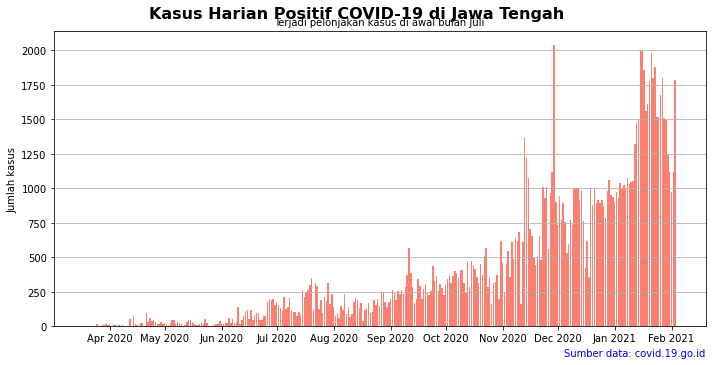

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Tengah',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Grafik kasus sembuh

<Figure size 432x288 with 0 Axes>

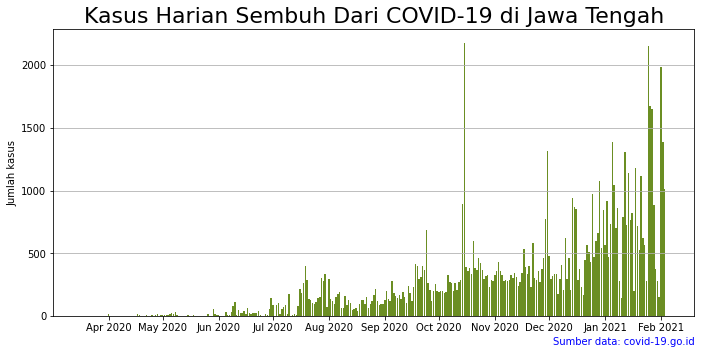

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid-19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Grafik kasus meninggal

<Figure size 432x288 with 0 Axes>

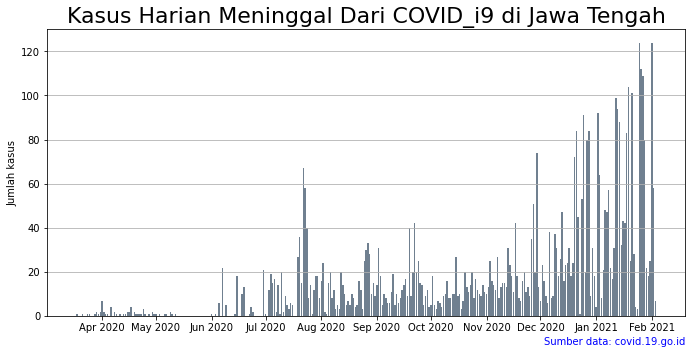

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jateng_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID_i9 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Perkembangan kasus dalam pekan

In [42]:
cov_jateng_pekanan = (cov_jateng_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jateng_pekanan['tahun'] = cov_jateng_pekanan['tanggal'].apply(lambda x: x.year)
cov_jateng_pekanan['pekan_ke'] =cov_jateng_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jateng_pekanan = cov_jateng_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jateng_pekanan:')
print(cov_jateng_pekanan.info())
print('\nLima data teratas cov_jateng_pekanan:\n', cov_jateng_pekanan.head())

Info cov_jateng_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     47 non-null     int64
 1   pekan_ke  47 non-null     int64
 2   jumlah    47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None

Lima data teratas cov_jateng_pekanan:
    tahun  pekan_ke  jumlah
0   2020        12       5
1   2020        13      47
2   2020        14      55
3   2020        15      80
4   2020        16     149


#Membandingkan apakah kasus kepan ini lebih baik dari pekan kemaren

In [44]:
cov_jateng_pekanan['jumlah_pekanlalu'] = cov_jateng_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jateng_pekanan['lebih_baik'] = cov_jateng_pekanan['jumlah'] < cov_jateng_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jateng_pekanan.head(10))


Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        12       5                 0       False
1   2020        13      47                 5       False
2   2020        14      55                47       False
3   2020        15      80                55       False
4   2020        16     149                80       False
5   2020        17     302               149       False
6   2020        18     127               302        True
7   2020        19     201               127       False
8   2020        20     180               201        True
9   2020        21     152               180        True


# Bar Chart 

<Figure size 432x288 with 0 Axes>

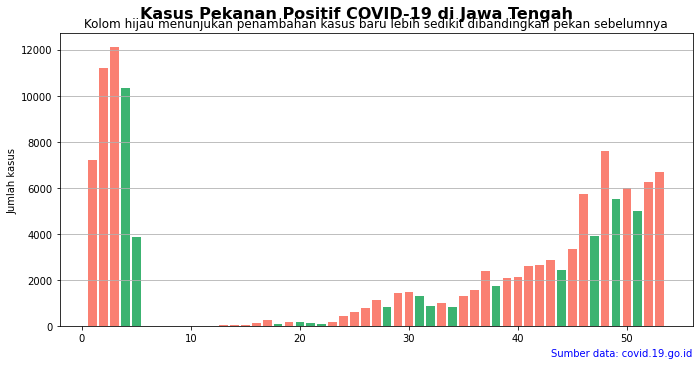

In [46]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(data = cov_jateng_pekanan, x= 'pekan_ke', height= 'jumlah', 
	   color = ['mediumseagreen' if x is True else 'salmon' for x in
cov_jateng_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Tengah',
			 y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan pekan sebelumnya', fontsize = 12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color = 'blue',
		ha = 'right', transform = ax.transAxes)
				
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pola dan dinamika

In [61]:
cov_jeteng_akumulasi = cov_jateng_tidy[['tanggal']].copy()
cov_jeteng_akumulasi['akumulasi_aktif'] = (cov_jateng_tidy['kasus_baru'] - cov_jateng_tidy['sembuh'] - cov_jateng_tidy['meninggal']).cumsum()
cov_jeteng_akumulasi['akumulasi_sembuh'] = cov_jateng_tidy['sembuh'].cumsum()
cov_jeteng_akumulasi['akumulasi_meninggal'] = cov_jateng_tidy['meninggal'].cumsum()
cov_jeteng_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
318,2021-01-30,39452,79800,4977
319,2021-01-31,40390,79952,5002
320,2021-02-01,39252,81940,5126
321,2021-02-02,38924,83326,5184
322,2021-02-03,39690,84336,5191


#Line Chart

<Figure size 432x288 with 0 Axes>

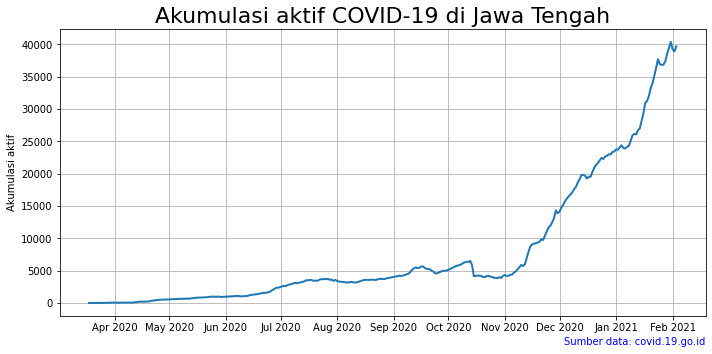

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jeteng_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Tengah',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

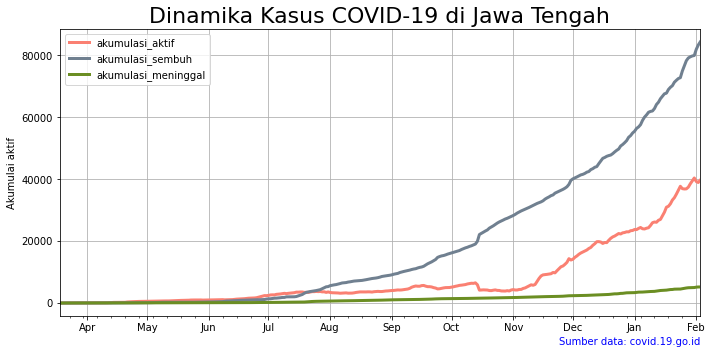

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
cov_jeteng_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
						 color=['salmon', 'slategrey', 'olivedrab'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulai aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color ='blue', 
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()